### Import Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
coursedata = pd.read_csv("drive/MyDrive/coursera_data_course_level.csv")
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
0,"Cloud Computing Concepts, Part 1",Beginner Level,Approx. 23 hours to complete,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...
1,The Challenges of Global Health,Beginner Level,Approx. 20 hours to complete,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t..."
2,Digital Marketing Analytics in Theory,Beginner Level,Approx. 20 hours to complete,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar..."
3,Digital Product Management: Modern Fundamentals,Beginner Level,Approx. 11 hours to complete,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will..."
4,The Nature of Genius,Beginner Level,Approx. 28 hours to complete,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin..."


### Data Summary


In [ ]:
coursedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   course_title      6134 non-null   object
 1   difficulty_level  4736 non-null   object
 2   duration          6096 non-null   object
 3   skills            6636 non-null   object
 4   instructors       6636 non-null   object
 5   description       6635 non-null   object
 6   rating            4651 non-null   object
 7   offered_by        6636 non-null   object
 8   language          6636 non-null   object
 9   syllabus_heading  6636 non-null   object
 10  syllabus_details  6636 non-null   object
dtypes: object(11)
memory usage: 570.4+ KB


In [ ]:
coursedata.describe()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
count,6134,4736,6096,6636,6636,6635,4651,6636,6636,6636,6636
unique,6117,3,85,2990,3159,6126,21,261,21,5943,5440
top,Leadership,Beginner Level,Approx. 12 hours to complete,[],[],We help millions of organizations empower thei...,4.8\nstars,Google Cloud,English,[],[]
freq,3,3057,330,3437,504,502,1186,739,4824,540,539


In [ ]:
coursedata.columns

Index(['course_title', 'difficulty_level', 'duration', 'skills', 'instructors', 'description', 'rating', 'offered_by', 'language', 'syllabus_heading', 'syllabus_details'], dtype='object')

In [ ]:
coursedata.dtypes

course_title        object
difficulty_level    object
duration            object
skills              object
instructors         object
description         object
rating              object
offered_by          object
language            object
syllabus_heading    object
syllabus_details    object
dtype: object

### Data Preprocessing

In [ ]:
coursedata['difficulty_level'].value_counts()

Beginner Level        3057
Intermediate Level    1489
Advanced Level         190
Name: difficulty_level, dtype: int64

In [ ]:
coursedata.shape

(6636, 11)

In [ ]:
#Replace NAN values intially with "0"
#Extracting hours 
#Replaces "0" with median value
coursedata['duration'].fillna("0",inplace=True)
coursedata['duration'].value_counts().sum()

6636

In [ ]:
hours = coursedata['duration'].astype('str').str.extractall('(\d+)').unstack().sum(axis=1).astype(int)
coursedata['duration'] = hours
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t..."
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar..."
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will..."
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin..."


In [ ]:
coursedata['duration'].shape

(6636,)

In [ ]:
print(coursedata['duration'].median())

13.0


In [ ]:
# coursedata['duration'].value_counts()

In [ ]:

coursedata['duration']=coursedata['duration'].replace(0,int(coursedata['duration'].median()))
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t..."
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar..."
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will..."
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin..."


In [ ]:
coursedata['duration'].value_counts()

13     859
12     330
10     329
9      314
11     311
15     297
14     289
8      277
16     243
7      236
6      230
18     230
19     212
17     209
20     202
22     161
5      158
21     147
2      141
4      138
23     125
25     114
24     100
27      96
3       96
26      94
28      76
29      63
33      54
31      51
32      47
30      47
35      34
1       30
34      27
40      27
38      25
37      21
47      17
42      15
36      15
46      12
41      10
39      10
44       9
43       9
45       9
54       7
49       7
66       6
53       5
60       5
55       4
56       4
71       4
48       3
59       3
65       3
50       3
93       2
69       2
51       2
72       2
57       2
73       2
63       2
61       2
67       2
76       2
81       1
58       1
96       1
104      1
80       1
68       1
90       1
64       1
78       1
106      1
85       1
88       1
310      1
62       1
70       1
127      1
Name: duration, dtype: int64

In [ ]:
coursedata['difficulty_level'].isnull().sum()

1900

In [ ]:
#@title
#Replacing blank values of difficulty level with Unknown 
coursedata["difficulty_level"].fillna("Unknown", inplace = True)
coursedata["difficulty_level"].value_counts()

Beginner Level        3057
Unknown               1900
Intermediate Level    1489
Advanced Level         190
Name: difficulty_level, dtype: int64

In [ ]:
diff_lvl_dict = {'Beginner Level':1 , 'Intermediate Level':2, 'Advanced Level':3, 'Unknown':0}
coursedata['numeric_difficulty_lvl'] = coursedata.difficulty_level.map(diff_lvl_dict)
coursedata['numeric_difficulty_lvl'].value_counts()

1    3057
0    1900
2    1489
3     190
Name: numeric_difficulty_lvl, dtype: int64

In [ ]:
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details,numeric_difficulty_lvl
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...,1
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t...",1
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar...",1
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will...",1
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin...",1


In [ ]:
coursedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   course_title            6134 non-null   object
 1   difficulty_level        6636 non-null   object
 2   duration                6636 non-null   int64 
 3   skills                  6636 non-null   object
 4   instructors             6636 non-null   object
 5   description             6635 non-null   object
 6   rating                  4651 non-null   object
 7   offered_by              6636 non-null   object
 8   language                6636 non-null   object
 9   syllabus_heading        6636 non-null   object
 10  syllabus_details        6636 non-null   object
 11  numeric_difficulty_lvl  6636 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 622.2+ KB


Text(0.5, 1.0, 'NUMBER OF COURSES FOR DIFFERENT DURATION')

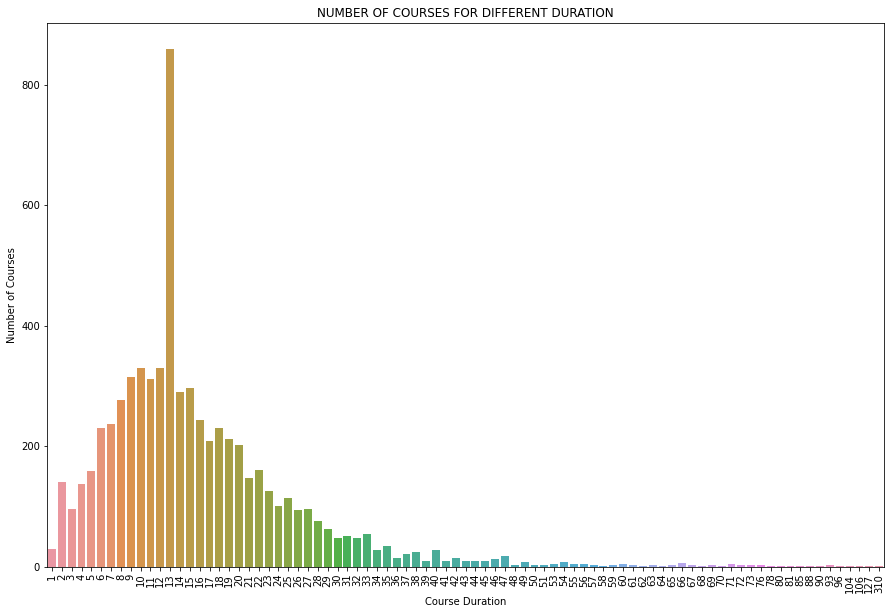

In [ ]:
#Course Duration Distribution throughout the data
#Rating Distribution throughout the data
import seaborn as sns
plt.figure(figsize=(15,10)) 
sns.countplot(x='duration', data=coursedata)
plt.xlabel('Course Duration')
plt.xticks(rotation=90)
plt.ylabel('Number of Courses')
plt.title('NUMBER OF COURSES FOR DIFFERENT DURATION')

In [ ]:
def label_race (row):
   if row['duration'] <= 10 :
      return 'Short Course Duration'
   if row['duration'] > 10 and row['duration'] <= 35 :
      return 'Medium Course  Duration'
   if row['duration'] >35 and row['duration'] <=70 :
      return 'Long Course Duration'
   if row['duration'] >70  :
      return 'Very Long Course Duration'

In [ ]:
coursedata['duration_label'] = coursedata.apply (lambda row: label_race(row), axis=1)

In [ ]:
coursedata["duration_label"].value_counts()

Medium Course  Duration      4418
Short Course Duration        1949
Long Course Duration          246
Very Long Course Duration      23
Name: duration_label, dtype: int64

In [ ]:
coursedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   course_title            6134 non-null   object
 1   difficulty_level        6636 non-null   object
 2   duration                6636 non-null   int64 
 3   skills                  6636 non-null   object
 4   instructors             6636 non-null   object
 5   description             6635 non-null   object
 6   rating                  4651 non-null   object
 7   offered_by              6636 non-null   object
 8   language                6636 non-null   object
 9   syllabus_heading        6636 non-null   object
 10  syllabus_details        6636 non-null   object
 11  numeric_difficulty_lvl  6636 non-null   int64 
 12  duration_label          6636 non-null   object
dtypes: int64(2), object(11)
memory usage: 674.1+ KB


In [ ]:
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details,numeric_difficulty_lvl,duration_label
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...,1,Medium Course Duration
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t...",1,Medium Course Duration
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar...",1,Medium Course Duration
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will...",1,Medium Course Duration
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin...",1,Medium Course Duration


In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
coursedata['combined_text'] = " CaliRollB " + coursedata["course_title"] + " CaliRollA " + coursedata["difficulty_level"] +  coursedata["skills"] +  coursedata["instructors"] +  \
                              coursedata["description"] +  coursedata["offered_by"] +  coursedata["language"] +  coursedata["syllabus_heading"] +  \
                              coursedata["syllabus_details"] +  coursedata["duration_label"]
coursedata['combined_text'][0]

' CaliRollB Cloud Computing Concepts, Part 1 CaliRollA Beginner Level[\'Distributed Algorithm\', \'Distributed Computing\', \'C++\', \'Cloud Computing\'][\'Indranil Gupta\']Cloud computing systems today, whether open-source or used inside companies, are built using a common set of core techniques, algorithms, and design philosophies – all centered around distributed systems. Learn about such fundamental distributed computing "concepts" for cloud computing. Some of these concepts include: clouds, MapReduce, key-value/NoSQL stores, classical distributed algorithms, widely-used distributed algorithms, scalability, trending areas, and much, much more! \n \nKnow how these systems work from the inside out. Get your hands dirty using these concepts with provided homework exercises. In the programming assignments, implement some of these concepts in template code (programs) provided in the C++ programming language. Prior experience with C++ is required.\n \nThe course also features interviews 

In [ ]:
coursedata['combined_text'][0]

' CaliRollB Cloud Computing Concepts, Part 1 CaliRollA Beginner Level[\'Distributed Algorithm\', \'Distributed Computing\', \'C++\', \'Cloud Computing\'][\'Indranil Gupta\']Cloud computing systems today, whether open-source or used inside companies, are built using a common set of core techniques, algorithms, and design philosophies – all centered around distributed systems. Learn about such fundamental distributed computing "concepts" for cloud computing. Some of these concepts include: clouds, MapReduce, key-value/NoSQL stores, classical distributed algorithms, widely-used distributed algorithms, scalability, trending areas, and much, much more! \n \nKnow how these systems work from the inside out. Get your hands dirty using these concepts with provided homework exercises. In the programming assignments, implement some of these concepts in template code (programs) provided in the C++ programming language. Prior experience with C++ is required.\n \nThe course also features interviews 

#Data Cleaning

In [ ]:
#Importing Necessary Libraries for Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#Downloading Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Load English Stop Words
stopword = stopwords.words('english')
print("Stopwords:",stopword)

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [ ]:
#Clean Function
def clean_text(twee):
    #Remove URL
    twee = re.sub(r'https?://\S+|www\.\S+', " ", twee)

    #Remove Mentions
    twee = re.sub(r'@\w+',' ',twee)

    #Remove Punctuation
    twee= re.sub(r'[^\w\s\d\$]',' ',twee)

    #Remove Digits
    twee = re.sub(r'\d+', ' ', twee)

    #Remove HTML tags
    twee = re.sub('r<.*?>',' ', twee)

    #Remove Hastags
    twee = re.sub(r'#\w+', ' ', twee)

    #Remove Stop Words 
    twee = twee.split()
    #twee = " ".join(twee)
    
    twee = " ".join([word for word in twee if not word in stopword])

    return twee

In [ ]:
#Applying Tweet Clean Function to Both Files
coursedata['clean_combined_text'] = coursedata['combined_text'].astype(str).apply(lambda x: clean_text(x))

In [ ]:
coursedata['combined_text'][0]

' CaliRollB Cloud Computing Concepts, Part 1 CaliRollA Beginner Level[\'Distributed Algorithm\', \'Distributed Computing\', \'C++\', \'Cloud Computing\'][\'Indranil Gupta\']Cloud computing systems today, whether open-source or used inside companies, are built using a common set of core techniques, algorithms, and design philosophies – all centered around distributed systems. Learn about such fundamental distributed computing "concepts" for cloud computing. Some of these concepts include: clouds, MapReduce, key-value/NoSQL stores, classical distributed algorithms, widely-used distributed algorithms, scalability, trending areas, and much, much more! \n \nKnow how these systems work from the inside out. Get your hands dirty using these concepts with provided homework exercises. In the programming assignments, implement some of these concepts in template code (programs) provided in the C++ programming language. Prior experience with C++ is required.\n \nThe course also features interviews 

In [ ]:
coursedata['clean_combined_text'][0]

'CaliRollB Cloud Computing Concepts Part CaliRollA Beginner Level Distributed Algorithm Distributed Computing C Cloud Computing Indranil Gupta Cloud computing systems today whether open source used inside companies built using common set core techniques algorithms design philosophies centered around distributed systems Learn fundamental distributed computing concepts cloud computing Some concepts include clouds MapReduce key value NoSQL stores classical distributed algorithms widely used distributed algorithms scalability trending areas much much Know systems work inside Get hands dirty using concepts provided homework exercises In programming assignments implement concepts template code programs provided C programming language Prior experience C required The course also features interviews leading researchers managers industry academia The University Illinois Urbana Champaign world leader research teaching public engagement distinguished breadth programs broad academic excellence inte

In [ ]:
coursedata2 = coursedata[coursedata.clean_combined_text.map(lambda x: x.isascii())]

In [ ]:
coursedata2['clean_combined_text'][0]

'CaliRollB Cloud Computing Concepts Part CaliRollA Beginner Level Distributed Algorithm Distributed Computing C Cloud Computing Indranil Gupta Cloud computing systems today whether open source used inside companies built using common set core techniques algorithms design philosophies centered around distributed systems Learn fundamental distributed computing concepts cloud computing Some concepts include clouds MapReduce key value NoSQL stores classical distributed algorithms widely used distributed algorithms scalability trending areas much much Know systems work inside Get hands dirty using concepts provided homework exercises In programming assignments implement concepts template code programs provided C programming language Prior experience C required The course also features interviews leading researchers managers industry academia The University Illinois Urbana Champaign world leader research teaching public engagement distinguished breadth programs broad academic excellence inte

In [ ]:
coursedata2.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details,numeric_difficulty_lvl,duration_label,combined_text,clean_combined_text
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...,1,Medium Course Duration,"CaliRollB Cloud Computing Concepts, Part 1 Ca...",CaliRollB Cloud Computing Concepts Part CaliRo...
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t...",1,Medium Course Duration,CaliRollB The Challenges of Global Health Cal...,CaliRollB The Challenges Global Health CaliRol...
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar...",1,Medium Course Duration,CaliRollB Digital Marketing Analytics in Theo...,CaliRollB Digital Marketing Analytics Theory C...
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will...",1,Medium Course Duration,CaliRollB Digital Product Management: Modern ...,CaliRollB Digital Product Management Modern Fu...
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin...",1,Medium Course Duration,CaliRollB The Nature of Genius CaliRollA Begi...,CaliRollB The Nature Genius CaliRollA Beginner...


In [ ]:
coursedata2['clean_combined_text'].value_counts()

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
coursedata2.shape

(3190, 15)

In [ ]:
coursedata2 = coursedata2.dropna()

In [ ]:
course_text = coursedata2[['clean_combined_text']]
course_text['index'] = course_text.index
documents = course_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
documents

,clean_combined_text,index
0,CaliRollB Cloud Computing Concepts Part CaliRo...,0
1,CaliRollB The Challenges Global Health CaliRol...,1
2,CaliRollB Digital Marketing Analytics Theory C...,2
3,CaliRollB Digital Product Management Modern Fu...,3
7,CaliRollB Grow Your Business Goldman Sachs Wom...,7
...,...,...
6611,CaliRollB Introduction XR VR AR MR Foundations...,6611
6616,CaliRollB Global Adolescent Health CaliRollA B...,6616
6617,CaliRollB The Science Training Young Athletes ...,6617
6622,CaliRollB Getting Started Mainframe z OS Comma...,6622


In [ ]:
course_clean_1 = documents['clean_combined_text'].reset_index(drop=True)

In [ ]:
course_clean_1

0       CaliRollB Cloud Computing Concepts Part CaliRo...
1       CaliRollB The Challenges Global Health CaliRol...
2       CaliRollB Digital Marketing Analytics Theory C...
3       CaliRollB Digital Product Management Modern Fu...
4       CaliRollB Grow Your Business Goldman Sachs Wom...
                              ...                        
3185    CaliRollB Introduction XR VR AR MR Foundations...
3186    CaliRollB Global Adolescent Health CaliRollA B...
3187    CaliRollB The Science Training Young Athletes ...
3188    CaliRollB Getting Started Mainframe z OS Comma...
3189    CaliRollB IBM z OS Rexx Programming CaliRollA ...
Name: clean_combined_text, Length: 3190, dtype: object

In [ ]:
course_clean = course_clean_1

In [ ]:

with open('course_clean_1.pkl','wb') as file:
  pickle.dump(course_clean_1,file)

In [ ]:
#def text_one_liner(books_list):
#    for x in range(len(books_list)):
#        books_list[x] = books_list[x].replace('\n', ' ')
#    return books_list

#course_clean = text_one_liner(course_clean_1)

In [ ]:
len(course_clean)

3190

In [ ]:
#documents['clean_combined_text']

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def lemmatize_stemming(text):
    return text #stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
processed_docs = course_clean.map(preprocess)
processed_docs[:10]

0    [calirollb, cloud, computing, concepts, caliro...
1    [calirollb, challenges, global, health, caliro...
2    [calirollb, digital, marketing, analytics, the...
3    [calirollb, digital, product, management, mode...
4    [calirollb, grow, business, goldman, sachs, wo...
5    [calirollb, fundamentals, negotiation, goldman...
6    [calirollb, fundamentals, business, finance, g...
7    [calirollb, fundamentals, leadership, goldman,...
8    [calirollb, fundamentals, customers, competiti...
9    [calirollb, fundamentals, financial, planning,...
Name: clean_combined_text, dtype: object

In [ ]:
with open('processed_docs.pkl','wb') as file:
  pickle.dump(processed_docs,file)

#TF-IDF
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 academia
1 academic
2 agree
3 algorithm
4 algorithms
5 allows
6 alumni
7 analysis
8 analyzes
9 apache
10 applications


Filter out tokens that appear in

*   Less than 15 documents (absolute number) or
*   more than 0.5 documents (fraction of total corpus size, not absolute number)
*   after the above two steps, keep only the first 100000 most frequent tokens.

In [ ]:
#dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3000]

[(19, 1),
 (25, 1),
 (26, 1),
 (49, 1),
 (53, 4),
 (58, 1),
 (71, 1),
 (79, 1),
 (92, 1),
 (115, 1),
 (124, 1),
 (130, 1),
 (139, 1),
 (153, 1),
 (173, 1),
 (184, 1),
 (216, 3),
 (224, 2),
 (236, 1),
 (301, 1),
 (316, 1),
 (317, 2),
 (319, 1),
 (348, 1),
 (384, 1),
 (396, 1),
 (405, 1),
 (420, 2),
 (429, 1),
 (446, 2),
 (449, 1),
 (454, 4),
 (524, 2),
 (575, 1),
 (625, 1),
 (648, 1),
 (668, 1),
 (827, 1),
 (943, 1),
 (962, 1),
 (963, 1),
 (981, 1),
 (1004, 1),
 (1143, 1),
 (1167, 1),
 (1171, 1),
 (1198, 1),
 (1261, 2),
 (1269, 3),
 (1275, 1),
 (1309, 1),
 (1500, 4),
 (1653, 1),
 (1665, 1),
 (1670, 1),
 (1695, 1),
 (1802, 1),
 (1902, 2),
 (2110, 1),
 (2120, 1),
 (2313, 1),
 (2382, 1),
 (2733, 1),
 (2766, 1),
 (2788, 2),
 (2797, 1),
 (2854, 1),
 (3459, 1),
 (3653, 1),
 (3817, 1),
 (3892, 1),
 (4020, 1),
 (4052, 1),
 (4057, 1),
 (4069, 1),
 (4232, 2),
 (4402, 1),
 (4694, 1),
 (5484, 1),
 (6073, 1),
 (6074, 1),
 (6177, 3),
 (6187, 1),
 (6648, 1),
 (6655, 1),
 (6658, 1),
 (7037, 1),
 (7051,

In [ ]:
bow_doc_4310 = bow_corpus[3000]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 19 ("beginner") appears 1 time.
Word 25 ("calirolla") appears 1 time.
Word 26 ("calirollb") appears 1 time.
Word 49 ("concepts") appears 1 time.
Word 53 ("course") appears 4 time.
Word 58 ("covers") appears 1 time.
Word 71 ("duration") appears 1 time.
Word 79 ("excellence") appears 1 time.
Word 92 ("fundamental") appears 1 time.
Word 115 ("introduction") appears 1 time.
Word 124 ("leading") appears 1 time.
Word 130 ("level") appears 1 time.
Word 139 ("medium") appears 1 time.
Word 153 ("optional") appears 1 time.
Word 173 ("problems") appears 1 time.
Word 184 ("research") appears 1 time.
Word 216 ("time") appears 3 time.
Word 224 ("university") appears 2 time.
Word 236 ("world") appears 1 time.
Word 301 ("provide") appears 1 time.
Word 316 ("understand") appears 1 time.
Word 317 ("understanding") appears 2 time.
Word 319 ("videos") appears 1 time.
Word 348 ("complementary") appears 1 time.
Word 384 ("framework") appears 1 time.
Word 396 ("information") appears 1 time.
Word 405 ("l

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.025279235088450543),
 (1, 0.007424820929714573),
 (2, 0.028529141522810313),
 (3, 0.020869386840328897),
 (4, 0.14421723155962857),
 (5, 0.017879192637467428),
 (6, 0.014243588345844105),
 (7, 0.01627167716748426),
 (8, 0.06907573760065587),
 (9, 0.057785574270938424),
 (10, 0.009550121530161855),
 (11, 0.0066082058341978495),
 (12, 0.014669173896139993),
 (13, 0.0425080297370977),
 (14, 0.016702704478361582),
 (15, 0.06221747476366473),
 (16, 0.06819786316938767),
 (17, 0.03672175251873881),
 (18, 0.09947454697844448),
 (19, 0.004834555830897672),
 (20, 0.10265545246668198),
 (21, 0.018432764777910095),
 (22, 0.013968924130498672),
 (23, 0.018149959721788313),
 (24, 0.02142295898077157),
 (27, 0.08217675138367504),
 (28, 0.08971430175770827),
 (29, 0.035009348625016735),
 (30, 0.02352900974444924),
 (31, 0.019492288580486),
 (32, 0.06907573760065587),
 (33, 0.0425080297370977),
 (34, 0.035758385274934856),
 (35, 0.10069629830087866),
 (36, 0.07985686775615129),
 (37, 0.16435350

In [ ]:
with open('tfidf.pkl','wb') as file:
  pickle.dump(tfidf,file)

#Topic Number

In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim import corpora, models, similarities
import random
import os
from gensim.models import CoherenceModel
from gensim.models.nmf import Nmf as GensimNmf
coherence_val = []
topicnums = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
project_folder = os.getcwd()

nmfmodels_tfidf = {}
for i in topicnums:
    random.seed(42)
    if not os.path.exists(project_folder+'/drive/MyDrive/NMF Notebooks with Coherence/nmf_models_tfidf/nmfmodels_tfidf'+str(i)+'.nmf'):
        %time nmfmodels_tfidf[i] = GensimNmf(corpus=corpus_tfidf,num_topics=i,id2word=dictionary,chunksize=2000,passes=5,kappa=.1,minimum_probability=0.01,w_max_iter=300,w_stop_condition=0.0001,h_max_iter=100,h_stop_condition=0.001,eval_every=10,normalize=True,random_state=42)
        nmfmodels_tfidf[i].save(project_folder+'/drive/MyDrive/NMF Notebooks with Coherence/nmf_models_tfidf/nmfmodels_tfidf'+str(i)+'.nmf')
        print('nmfmodels_tfidf{}.nmf created.'.format(i))
        coherence_model_nmf = CoherenceModel(model=nmfmodels_tfidf[i], texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_nmf = coherence_model_nmf.get_coherence()
        print('Coherence Score: ', coherence_nmf)
        coherence_val.append(coherence_nmf)
    else: 
        print('nmfmodels_tfidf{}.nmf already exists.'.format(i))



CPU times: user 18.2 s, sys: 3.36 s, total: 21.6 s
Wall time: 18.7 s
nmfmodels_tfidf1.nmf created.
Coherence Score:  0.31841834139848707
CPU times: user 22.7 s, sys: 5.74 s, total: 28.5 s
Wall time: 25.9 s
nmfmodels_tfidf5.nmf created.
Coherence Score:  0.4105278287908991
CPU times: user 29.4 s, sys: 8.89 s, total: 38.3 s
Wall time: 29.4 s
nmfmodels_tfidf10.nmf created.
Coherence Score:  0.49153594607207846
CPU times: user 33.6 s, sys: 11.9 s, total: 45.5 s
Wall time: 29.9 s
nmfmodels_tfidf15.nmf created.
Coherence Score:  0.542077169253483
CPU times: user 41.9 s, sys: 14.7 s, total: 56.6 s
Wall time: 39.1 s
nmfmodels_tfidf20.nmf created.
Coherence Score:  0.5394696946117653
CPU times: user 48.3 s, sys: 19.5 s, total: 1min 7s
Wall time: 43.6 s
nmfmodels_tfidf25.nmf created.
Coherence Score:  0.4934419161135633
CPU times: user 59 s, sys: 21.7 s, total: 1min 20s
Wall time: 52.2 s
nmfmodels_tfidf30.nmf created.
Coherence Score:  0.5022046832042941
CPU times: user 1min 4s, sys: 24.9 s, tot

In [ ]:
import pickle
nmf_topics = {}
for i in topicnums:
    nmf_model = GensimNmf.load(project_folder+'/drive/MyDrive/NMF Notebooks with Coherence/nmf_models_tfidf/nmfmodels_tfidf'+str(i)+'.nmf')
    nmf_topics_string = nmf_model.show_topics(i)
    nmf_topics[i] = ["".join([c if c.isalpha() else " " for c in topic[1]]).split() for topic in nmf_topics_string]

pickle.dump(nmf_topics,open(project_folder+'/drive/MyDrive/NMF Notebooks with Coherence/nmf_models_tfidf/pub_nmf_tfidf_topics.pkl','wb'))

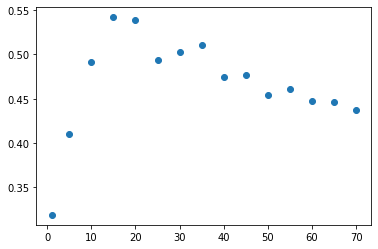

In [ ]:
import matplotlib.pyplot as plt
#coherence_val, topicnums
plt.scatter(topicnums, coherence_val)
plt.show()

#Optimal Model

In [ ]:
num_topics = 15
nmf_model_final = GensimNmf.load(project_folder+'/drive/MyDrive/NMF Notebooks with Coherence/nmf_models_tfidf/nmfmodels_tfidf'+str(num_topics)+'.nmf')

In [ ]:
from pprint import pprint
top_topics = nmf_model_final.top_topics(corpus_tfidf, topn=10)

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

counter = 0
for topic in top_topics:
    print('Topic {}:'.format(counter))
    counter += 1
    pprint(topic)
    
pickle.dump(nmf_topics,open(project_folder+'/drive/MyDrive/NMF Notebooks with Coherence/nmf_models_tfidf/pub_nmf_tfidf_topics.pkl','wb'))

Average topic coherence: -2.4406.
Topic 0:
([(0.04520676687537608, 'cloud'),
  (0.02706266155503959, 'security'),
  (0.020992462712879585, 'amazon'),
  (0.01404226666486435, 'services'),
  (0.012477767309863908, 'network'),
  (0.012401554980931857, 'computing'),
  (0.009980875905216463, 'applications'),
  (0.009663229427591595, 'infrastructure'),
  (0.009614900227897653, 'google'),
  (0.009407223657898483, 'networking')],
 -1.3857293698317432)
Topic 1:
([(0.03261082346638622, 'project'),
  (0.02835956891464547, 'cybersecurity'),
  (0.016697102717404416, 'capstone'),
  (0.01445704893283448, 'science'),
  (0.012939712636922023, 'projects'),
  (0.010701674659051419, 'analysis'),
  (0.010213288889904767, 'data'),
  (0.010042823847299532, 'visualization'),
  (0.00948713151608974, 'engineering'),
  (0.008637818495576335, 'systems')],
 -1.6899061705197163)
Topic 2:
([(0.013196132545236666, 'business'),
  (0.012878416669887403, 'risk'),
  (0.012462291468312715, 'value'),
  (0.01179864370926217

In [ ]:
corpus_nmf_model = nmf_model_final[corpus_tfidf]
for article in corpus_nmf_model[0]:
    print(article)

(0, 0.044727680106661595)
(1, 0.04890066022423583)
(2, 0.21052998176921583)
(3, 0.05341623935164988)
(4, 0.1352206741098339)
(5, 0.04930080625928264)
(6, 0.059260085197652676)
(8, 0.037401086425410145)
(9, 0.013488348275633895)
(10, 0.09037351353973398)
(11, 0.04324692247491721)
(12, 0.027751983543346088)
(13, 0.14781927255893745)
(14, 0.034702076243147785)


In [ ]:
#Recommendet System

In [ ]:
index = similarities.MatrixSimilarity(nmf_model_final[corpus_tfidf])

In [ ]:
with open('index.pkl','wb') as file:
  pickle.dump(index,file)

In [ ]:
unseen_document = 'Machine Learning'

In [ ]:
bow_vector = dictionary.doc2bow(preprocess(unseen_document)) 
tfidf_vector = tfidf[bow_vector]
tfidf_vector_ordered = sorted(tfidf_vector, key=lambda x: x[1], reverse=True)
print(tfidf_vector_ordered[:10])

#bow_vector_ordered = sorted(bow_vector, key=lambda x: x[1], reverse=True)
#print(bow_vector_ordered[:10])

[(2561, 0.9536691529084148), (405, 0.30085735289493354)]


In [ ]:
nmf_vector_other = nmf_model_final[tfidf_vector_ordered]
#lda_vector_other = lda_model_final[bow_vector_ordered]
print(nmf_vector_other)

[(5, 0.6839548357212218), (6, 0.03176464044090103), (14, 0.28082366161418654)]


In [ ]:
sims = index[nmf_vector_other]
sims = list(enumerate(sims))
recommendation_scores_1 = []



In [ ]:
len(sims)

3190

In [ ]:
len(course_clean)

3190

In [ ]:
for sim in sims:
    course_num = sim[0]
    recommendation_score_1 = [course_clean[course_num], sim[1]]
    recommendation_scores_1.append(recommendation_score_1)

#recommendation_2 = recommendation_scores_1
recommendation_2 = sorted(recommendation_scores_1, key=lambda x: x[1], reverse=True)

print("Your book's most prominant topic is:")
print(nmf_model_final.print_topic(max(nmf_vector_other, key=lambda item: item[1])[0]))
print('-----')
print('Here are your recommendations for your book.')
display(recommendation_2[:11])

Your book's most prominant topic is:
0.032*"data" + 0.027*"machine" + 0.027*"azure" + 0.013*"microsoft" + 0.011*"learning" + 0.011*"regression" + 0.010*"analytics" + 0.010*"algorithms" + 0.010*"neural" + 0.009*"exam"
-----
Here are your recommendations for your book.


[['CaliRollB Machine Learning Introduction Everyone CaliRollA Beginner Level Deep Learning Artificial Intelligence AI Machine Learning Reinforcement Learning Machine Learning Model Lifecycle Aije Egwaikhide Yasmine Hemmati This three module course introduces machine learning data science everyone foundational understanding machine learning models You learn history machine learning applications machine learning machine learning model lifecycle tools machine learning You also learn supervised versus unsupervised learning classification regression evaluating machine learning models Our labs give hands experience machine learning data science concepts You develop concrete machine learning skills well create final project demonstrating proficiency IBM global leader business transformation open hybrid cloud platform AI serving clients countries around world Today Fortune Companies rely IBM Cloud run business IBM Watson enterprise AI hard work engagements IBM also one world vital corporate re

In [ ]:
len(recommendation_2)

3190

In [ ]:
coursedata2.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details,numeric_difficulty_lvl,duration_label,combined_text,clean_combined_text
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...,1,Medium Course Duration,"CaliRollB Cloud Computing Concepts, Part 1 Ca...",CaliRollB Cloud Computing Concepts Part CaliRo...
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t...",1,Medium Course Duration,CaliRollB The Challenges of Global Health Cal...,CaliRollB The Challenges Global Health CaliRol...
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar...",1,Medium Course Duration,CaliRollB Digital Marketing Analytics in Theo...,CaliRollB Digital Marketing Analytics Theory C...
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will...",1,Medium Course Duration,CaliRollB Digital Product Management: Modern ...,CaliRollB Digital Product Management Modern Fu...
7,"Grow Your Business with Goldman Sachs 10,000 W...",Unknown,4,"['Opportunity Identification', 'Strategic Thin...","['Goldman Sachs 10,000 Women', 'Edward David',...",This free online course is one of 10 courses a...,4.8\nstars,Goldman Sachs,English,"['Grow Your Business with Goldman Sachs 10,000...","['In this course, you will identify one specif...",0,Short Course Duration,CaliRollB Grow Your Business with Goldman Sac...,CaliRollB Grow Your Business Goldman Sachs Wom...


In [ ]:
import pickle

with open('coursedata2.pkl','wb') as file:
  pickle.dump(coursedata2,file)

In [ ]:
#recommendation_2[:1]

In [ ]:
recommendation_2 = [x[0] for x in recommendation_2]

In [ ]:
#result_df=coursedata2[coursedata2["clean_combined_text"].isin(recommendation_2[:12])]

In [ ]:
l=coursedata2["clean_combined_text"]

In [ ]:
print(l)

0       CaliRollB Cloud Computing Concepts Part CaliRo...
1       CaliRollB The Challenges Global Health CaliRol...
2       CaliRollB Digital Marketing Analytics Theory C...
3       CaliRollB Digital Product Management Modern Fu...
7       CaliRollB Grow Your Business Goldman Sachs Wom...
                              ...                        
6611    CaliRollB Introduction XR VR AR MR Foundations...
6616    CaliRollB Global Adolescent Health CaliRollA B...
6617    CaliRollB The Science Training Young Athletes ...
6622    CaliRollB Getting Started Mainframe z OS Comma...
6634    CaliRollB IBM z OS Rexx Programming CaliRollA ...
Name: clean_combined_text, Length: 3190, dtype: object


In [ ]:
ids=[]
for each in recommendation_2[:12]:
  for key,value in enumerate(l):
    if each==value:
      ids.append(key)

print(ids)



[1853, 1991, 802, 266, 2218, 369, 759, 1990, 1842, 2302, 876, 772]


In [ ]:
coursedata2.iloc[ids]

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details,numeric_difficulty_lvl,duration_label,combined_text,clean_combined_text
4113,Machine Learning Introduction for Everyone,Beginner Level,7,"['Deep Learning', 'Artificial Intelligence (AI...","['Aije Egwaikhide', 'Yasmine Hemmati']",This three-module course introduces machine le...,4.5\nstars,IBM Skills Network,English,"['Machine Learning for Everyone', 'Machine Lea...",['Welcome to the world of machine learning. '...,1,Short Course Duration,CaliRollB Machine Learning Introduction for E...,CaliRollB Machine Learning Introduction Everyo...
4393,Microsoft Azure Machine Learning for Data Scie...,Intermediate Level,11,"['Machine Learning', 'Supervised Learning', 'R...",['Microsoft'],Machine learning is at the core of artificial ...,4.6\nstars,Microsoft,English,['Use Automated Machine Learning in Azure Mach...,"[""Training a machine learning model is an iter...",2,Medium Course Duration,CaliRollB Microsoft Azure Machine Learning fo...,CaliRollB Microsoft Azure Machine Learning Dat...
1610,Data Warehousing with Microsoft Azure Synapse ...,Intermediate Level,15,['Design a Modern Data Warehouse using Azure S...,['Microsoft'],"In this course, you will explore the tools and...",4.4\nstars,Microsoft,English,['Design a Modern Data Warehouse using Azure S...,"['In this module, you will learn how Azure Syn...",2,Medium Course Duration,CaliRollB Data Warehousing with Microsoft Azu...,CaliRollB Data Warehousing Microsoft Azure Syn...
580,Data Integration with Microsoft Azure Data Fac...,Intermediate Level,16,"['Create data pipelines in the cloud', 'Manage...",['Microsoft'],"In this course, you will learn how to create a...",3.9\nstars,Microsoft,English,['Integrate data with Azure Data Factory or Az...,['Describe the core components of Azure Data F...,2,Medium Course Duration,CaliRollB Data Integration with Microsoft Azu...,CaliRollB Data Integration Microsoft Azure Dat...
4831,Perform data science with Azure Databricks,Intermediate Level,26,['Perform machine learning with Azure Databric...,['Microsoft'],"In this course, you will learn how to harness ...",4.0\nstars,Microsoft,English,"['Introduction to Azure Databricks', 'Working ...","['In this module, you will discover the capabi...",2,Medium Course Duration,CaliRollB Perform data science with Azure Dat...,CaliRollB Perform data science Azure Databrick...
745,Build and Operate Machine Learning Solutions w...,Intermediate Level,31,['Work with Data and Compute in Azure Machine ...,['Microsoft'],Azure Machine Learning is a cloud platform for...,4.6\nstars,Microsoft,English,['Use the Azure Machine Learning SDK to train ...,['Azure Machine Learning provides a cloud-base...,2,Medium Course Duration,CaliRollB Build and Operate Machine Learning ...,CaliRollB Build Operate Machine Learning Solut...
1535,Data Engineering with MS Azure Synapse Apache ...,Intermediate Level,7,['Ingest data using Apache Spark Notebooks in ...,['Microsoft'],"In this course, you will learn how to perform ...",4.0\nstars,Microsoft,English,"['Big Data Engineering', 'Query pools and mana...",['In this module you will learn how to differe...,2,Short Course Duration,CaliRollB Data Engineering with MS Azure Syna...,CaliRollB Data Engineering MS Azure Synapse Ap...
4392,Microsoft Azure Machine Learning,Beginner Level,11,['Describe capabilities of no-code machine lea...,['Microsoft'],Machine learning is at the core of artificial ...,4.7\nstars,Microsoft,English,['Use Automated Machine Learning in Azure Mach...,"[""Training a machine learning model is an iter...",1,Medium Course Duration,CaliRollB Microsoft Azure Machine Learning Ca...,CaliRollB Microsoft Azure Machine Learning Cal...
4098,Introduction to Applied Machine Learning,Intermediate Level,7,[],['Anna Koop'],This course is for professionals who have hear...,4.7\nstars,Alberta Machine Intelligence Institute,English,['Introduction to Machine Learni

In [ ]:
coursedata2.to_csv("drive/MyDrive/final_coursera_data.csv")

In [ ]:
import pandas as pd
recommendation_course_name = pd.DataFrame()
recommendation_course_name['course_name'] =recommendation_2

In [ ]:
recommendation_course_name

,course_name
0,CaliRollB Machine Learning Introduction Everyo...
1,CaliRollB Microsoft Azure Machine Learning Dat...
2,CaliRollB Data Warehousing Microsoft Azure Syn...
3,CaliRollB Data Integration Microsoft Azure Dat...
4,CaliRollB Perform data science Azure Databrick...
...,...
3185,CaliRollB Keamanan IT Pertahanan terhadap Keja...
3186,CaliRollB Reliable Cloud Infrastructure Design...
3187,CaliRollB Essential Cloud Infrastructure Found...
3188,CaliRollB Social Marketing Capstone Project Ca...


In [ ]:
recommendation_course_name['course_name'][:2]

0    CaliRollB Machine Learning Introduction Everyo...
1    CaliRollB Microsoft Azure Machine Learning Dat...
Name: course_name, dtype: object

In [ ]:
import re
try :
    # here ; and / are our two markers 
    # in which string can be found. 
    marker1 = 'CaliRollB'
    marker2 = 'CaliRollA'
    regexPattern = marker1 + '(.+?)' + marker2
    str_found = re.search(regexPattern, str(recommendation_course_name['course_name'][0])).group(1)
except AttributeError:
    # Attribute error is expected if string 
    # is not found between given markers
    str_found = ' '
print(str_found)

 Machine Learning Introduction Everyone 


In [ ]:
str_found_list = []
for i in range(len(recommendation_course_name)):
  try :
    # here ; and / are our two markers 
    # in which string can be found. 
    marker1 = 'CaliRollB'
    marker2 = 'CaliRollA'
    regexPattern = marker1 + '(.+?)' + marker2
    str_found = re.search(regexPattern, str(recommendation_course_name['course_name'][i])).group(1)
  except AttributeError:
    # Attribute error is expected if string 
    # is not found between given markers
    str_found = ' '
  str_found_list.append(str_found)


In [ ]:
str_found_list[:5]

[' Machine Learning Introduction Everyone ',
 ' Microsoft Azure Machine Learning Data Scientists ',
 ' Data Warehousing Microsoft Azure Synapse Analytics ',
 ' Data Integration Microsoft Azure Data Factory ',
 ' Perform data science Azure Databricks ']

In [ ]:
reco_course_list = pd.DataFrame()
reco_course_list['course_name'] = str_found_list

In [ ]:
reco_course_list[:11]

,course_name
0,Machine Learning Introduction Everyone
1,Microsoft Azure Machine Learning Data Scienti...
2,Data Warehousing Microsoft Azure Synapse Anal...
3,Data Integration Microsoft Azure Data Factory
4,Perform data science Azure Databricks
5,Build Operate Machine Learning Solutions Azure
6,Data Engineering MS Azure Synapse Apache Spar...
7,Microsoft Azure Machine Learning
8,Introduction Applied Machine Learning
9,Prepare DP Data Science Microsoft Azure Exam


#Visualizations

In [ ]:
 nmf_coherence_val_bow = [0.3145802268809088,
 0.36577173889027814,
 0.4047424314319059,
 0.39299576450966084,
 0.39927810630680666,
 0.43446570869249923,
 0.40177867024198843,
 0.42990443646470994,
 0.4230064145016973,
 0.40915120617244655,
 0.40433615389521693,
 0.41216447426586983,
 0.41703859566031354,
 0.3885476706064307,
 0.40812723874633283]

In [ ]:
nmf_coherence_val_tfidf = [0.31841834139848707, 0.4105278287908991,  0.49153594607207846, 0.542077169253483, 0.5394696946117653, 0.4934419161135633, 0.5022046832042941,  0.5112089170637588,  0.47410936853095703, 0.4772485200472614, 0.45436004720503,
        0.4607039219688699,  0.44747326874166365, 0.4464744671682984, 0.4373479458161871]

In [ ]:
lda_coherence_val_bow = [0.33154806306597806,
 0.3782455582518339,
 0.3807397736121928,
 0.39567519302099463,
 0.41872378270731964,
 0.40742145778454963,
 0.4399491805082882,
 0.4364822755618616,
 0.43277472426470204,
 0.4443917639405443,
 0.4254990038332898,
 0.44404542360923477,
 0.43690138126678274,
 0.4425697122343801,
 0.43355401156855333]

In [ ]:
lda_coherence_val_tfidf =[0.31320522629740977, 0.4865744818541165, 0.5792985478425415, 0.5939631874165244, 0.587187963098512, 0.5874316932143413, 0.567978634324987, 0.5465017870286608, 0.581235620752691, 0.5743271031436911,
        0.5502400278779385, 0.5384933731201387, 0.5580239793207259, 0.5468898165426236, 0.5471786254763524]

In [ ]:
topicnums = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]

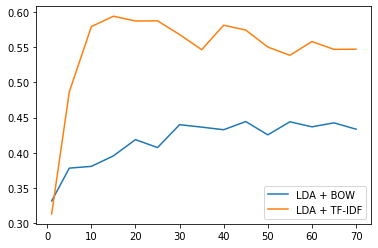

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#coherance_val_bow, coherence_val_tfidf,topicnums
plt.plot(topicnums,lda_coherence_val_bow, label = 'LDA + BOW' )
plt.plot(topicnums,lda_coherence_val_tfidf, label = 'LDA + TF-IDF' )
plt.legend()
plt.show()

In [ ]:
svd_coherence_bow = [0.29506118094227707,
 0.32741604257305734,
 0.3656936299167354,
 0.34821401017361503,
 0.31137669858440964,
 0.3188558997572673,
 0.29178490866273704,
 0.28525123340408204,
 0.286905309967944,
 0.2773425075253943,
 0.283770220388404,
 0.26903864235318126,
 0.27008488163150235,
 0.2629146136082968,
 0.26170011656740244]

In [ ]:
svd_coherence_tfidf = [0.3383365364146953,
 0.4296995053051453,
 0.4513375549894586,
 0.3974088635051966,
 0.3685745210805211,
 0.3469473912663723,
 0.346822855482052,
 0.346794575584143,
 0.36798150325631757,
 0.35159586913083174,
 0.3435026649681819,
 0.34848559224734005,
 0.3687433669948111,
 0.3741140625039322,
 0.37117680408748344]

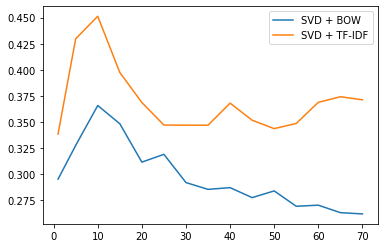

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#coherance_val_bow, coherence_val_tfidf,topicnums
plt.plot(topicnums,svd_coherence_bow, label = 'SVD + BOW' )
plt.plot(topicnums,svd_coherence_tfidf, label = 'SVD + TF-IDF' )
plt.legend()
plt.show()

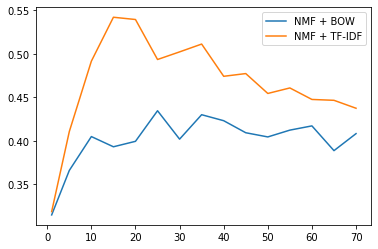

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#coherance_val_bow, coherence_val_tfidf,topicnums
plt.plot(topicnums,nmf_coherence_val_bow, label = 'NMF + BOW' )
plt.plot(topicnums,nmf_coherence_val_tfidf, label = 'NMF + TF-IDF' )
plt.legend()
plt.show()

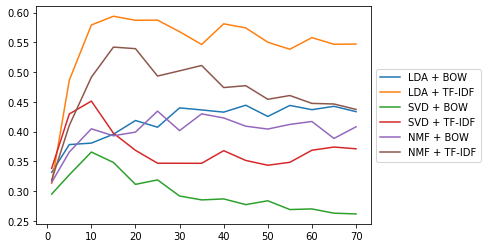

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#coherance_val_bow, coherence_val_tfidf,topicnums
plt.plot(topicnums,lda_coherence_val_bow, label = 'LDA + BOW' )
plt.plot(topicnums,lda_coherence_val_tfidf, label = 'LDA + TF-IDF' )
plt.plot(topicnums,svd_coherence_bow, label = 'SVD + BOW' )
plt.plot(topicnums,svd_coherence_tfidf, label = 'SVD + TF-IDF' )
plt.plot(topicnums,nmf_coherence_val_bow, label = 'NMF + BOW' )
plt.plot(topicnums,nmf_coherence_val_tfidf, label = 'NMF + TF-IDF' )

plt.legend(loc='center left',bbox_to_anchor =(1,0.5))
plt.show()